In [4]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np

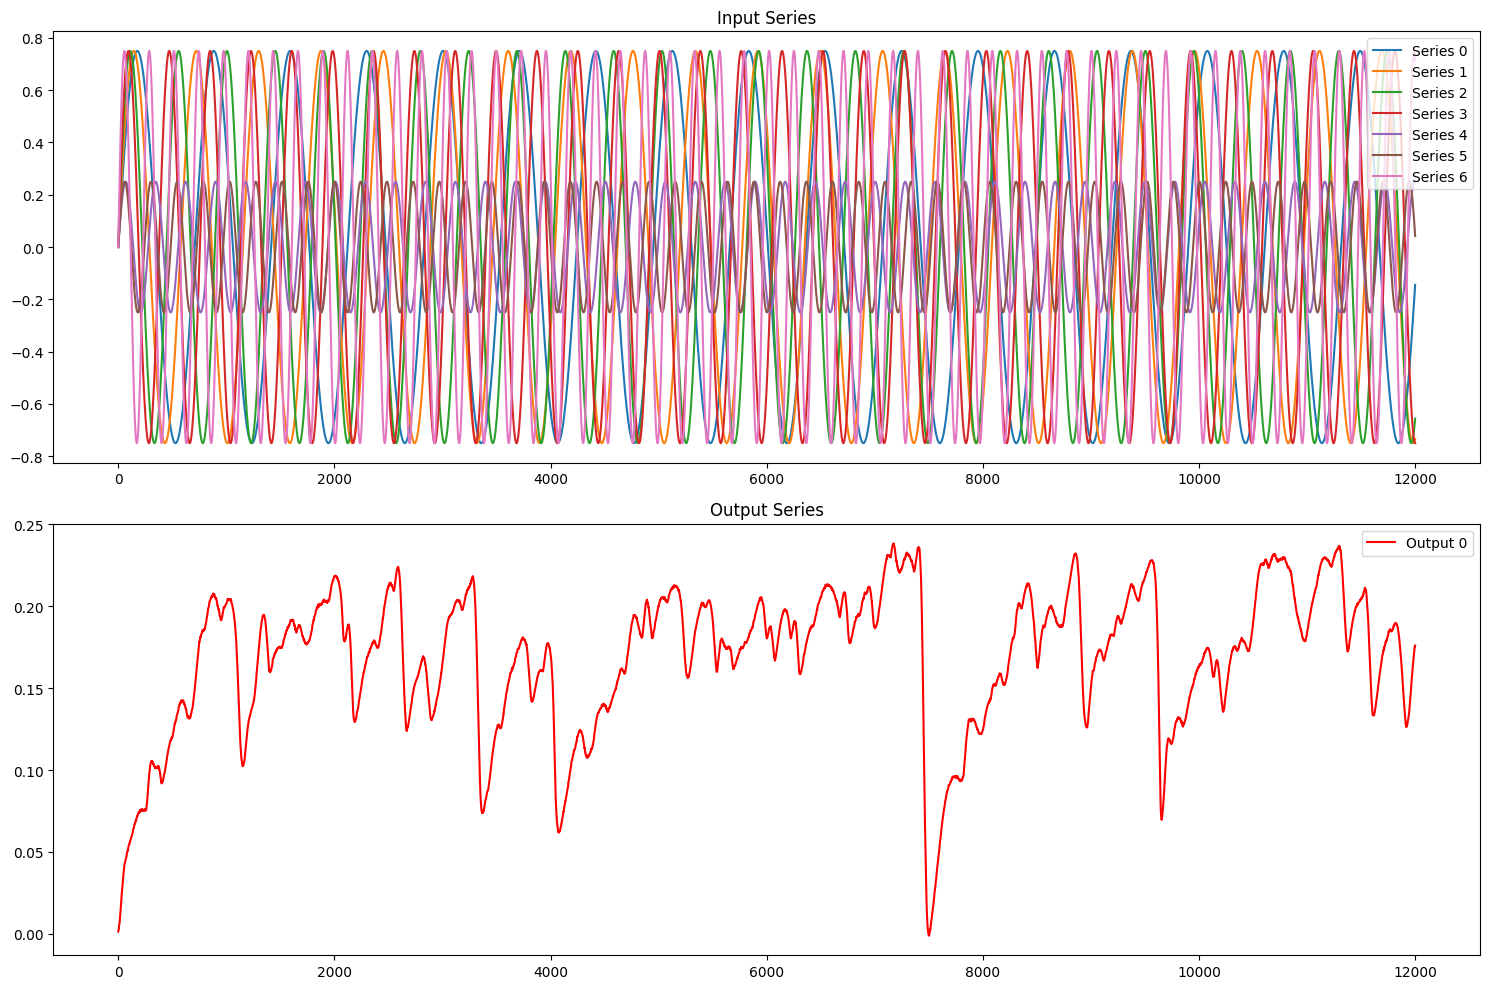

In [19]:
def get_sampling_data(filename: str, activation_electrode_no: int, readout_electrode_no: int):
    data = np.loadtxt(filename)
    inputs = data[:, :activation_electrode_no]
    outputs = data[:, -readout_electrode_no:]
    return inputs, outputs

def load_and_process_data(data_dir: str, activation_electrode_no: int, readout_electrode_no: int) -> pd.DataFrame:
    # Load the raw data
    inputs, outputs = get_sampling_data(f"{data_dir}/IO.dat", activation_electrode_no, readout_electrode_no)
    
    # Convert to pandas DataFrame
    df_inputs = pd.DataFrame(inputs, columns=[f'input_{i}' for i in range(activation_electrode_no)])
    df_outputs = pd.DataFrame(outputs, columns=[f'output_{i}' for i in range(readout_electrode_no)])
    
    # Combine inputs and outputs into one DataFrame
    df = pd.concat([df_inputs, df_outputs], axis=1)
    
    # Add additional columns required by TimeSeriesDataSet
    df['time_idx'] = np.arange(len(df))  # Assuming the data is sequential
    df['group_id'] = 0  # Assuming a single time series for simplicity
    
    return df

# Visualize the input and output series
def plot_time_series(df, activation_electrode_no, readout_electrode_no):
    fig, axs = plt.subplots(2, 1, figsize=(15, 10))
    
    # Plot inputs
    for i in range(activation_electrode_no):
        axs[0].plot(df['time_idx'], df[f'input_{i}'], label=f'Series {i}')
    axs[0].legend(loc='upper right')
    axs[0].set_title('Input Series')
    
    # Plot outputs
    for i in range(readout_electrode_no):
        axs[1].plot(df['time_idx'], df[f'output_{i}'], label=f'Output {i}', color='r')
    axs[1].legend(loc='upper right')
    axs[1].set_title('Output Series')
    
    plt.tight_layout()
    plt.show()


# Example usage:
data_dir = r"C:\Users\Noor1\Documents\omar\forecast\Files_BSC_thesis"
activation_electrode_no = 7
readout_electrode_no = 1
df = load_and_process_data(data_dir, activation_electrode_no, readout_electrode_no)
df.head()
# Plot the sample
plot_time_series(df.head(12000), activation_electrode_no, readout_electrode_no)

In [21]:
data = df[0:30000]
data.head()

input_0   input_1   input_2   input_3   input_4   input_5   input_6  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.006664  0.008162  0.010537  0.012467  0.005663  0.006476  0.020538   
2  0.013328  0.016323  0.021072  0.024931  0.011323  0.012947  0.041061   
3  0.019991  0.024482  0.031602  0.037388  0.016978  0.019410  0.061553   
4  0.026652  0.032638  0.042127  0.049834  0.022623  0.025860  0.081999   

   output_0  time_idx  group_id  
0  0.001330         0         0  
1  0.001524         1         0  
2  0.001718         2         0  
3  0.001977         3         0  
4  0.002349         4         0

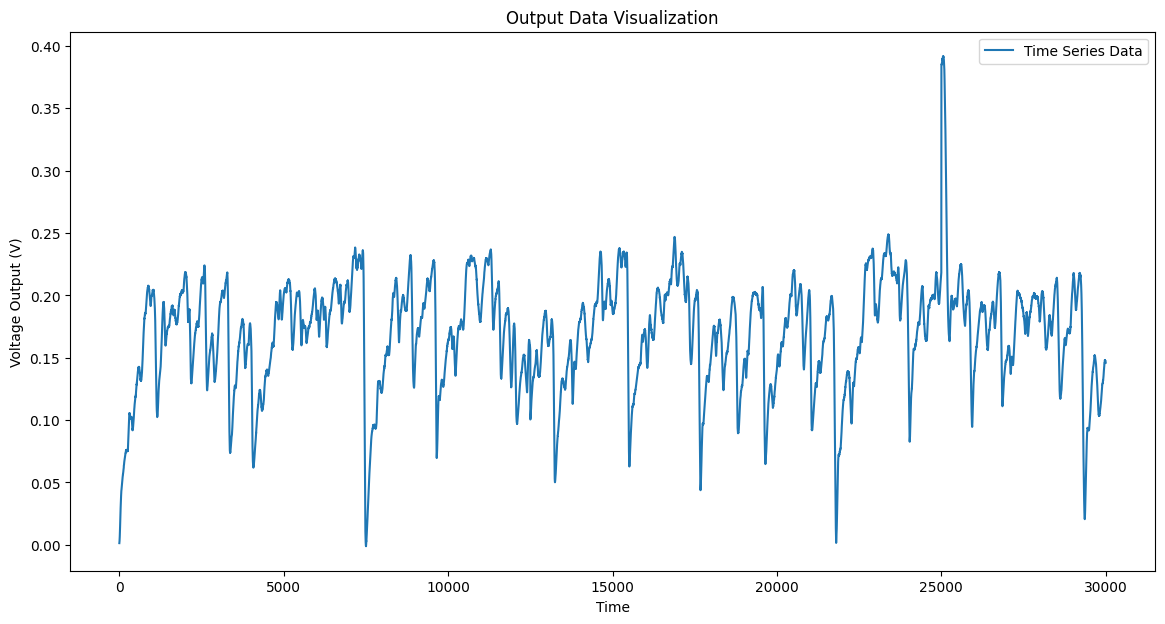

<Figure size 640x480 with 0 Axes>

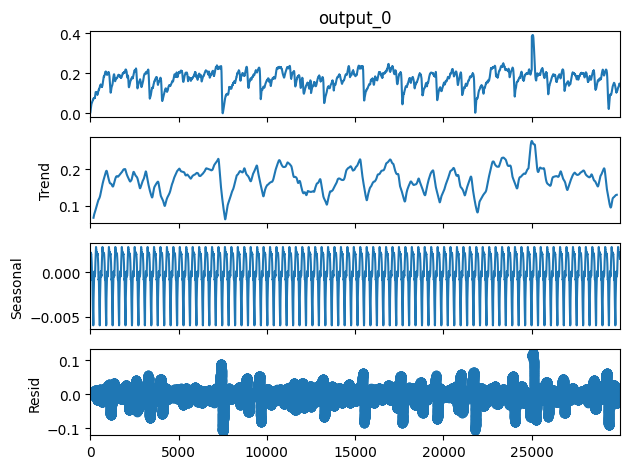

ADF Statistic: -9.445376125897454
p-value: 4.771332145217867e-16
Critical Value 1%: -3.4305683009682313
Critical Value 5%: -2.861636483122232
Critical Value 10%: -2.5668213550225185


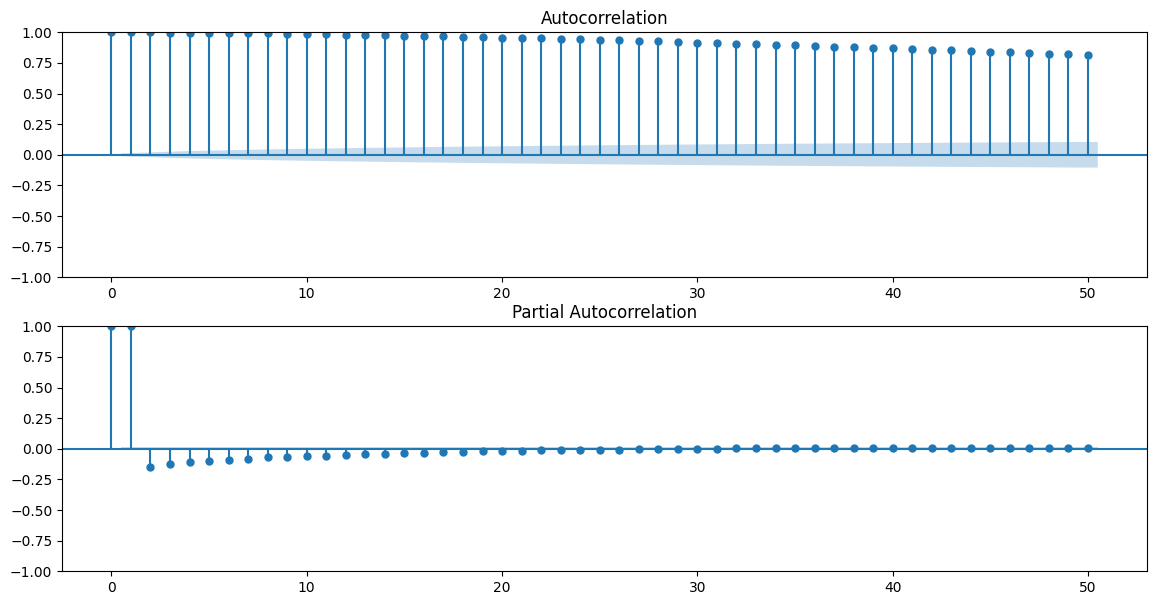

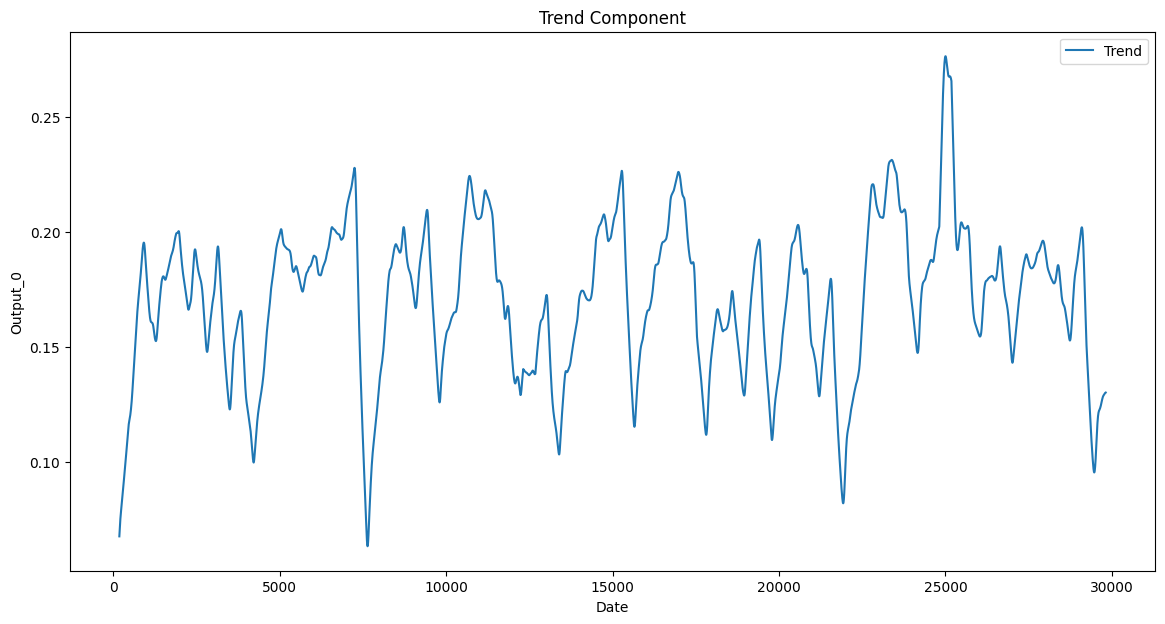

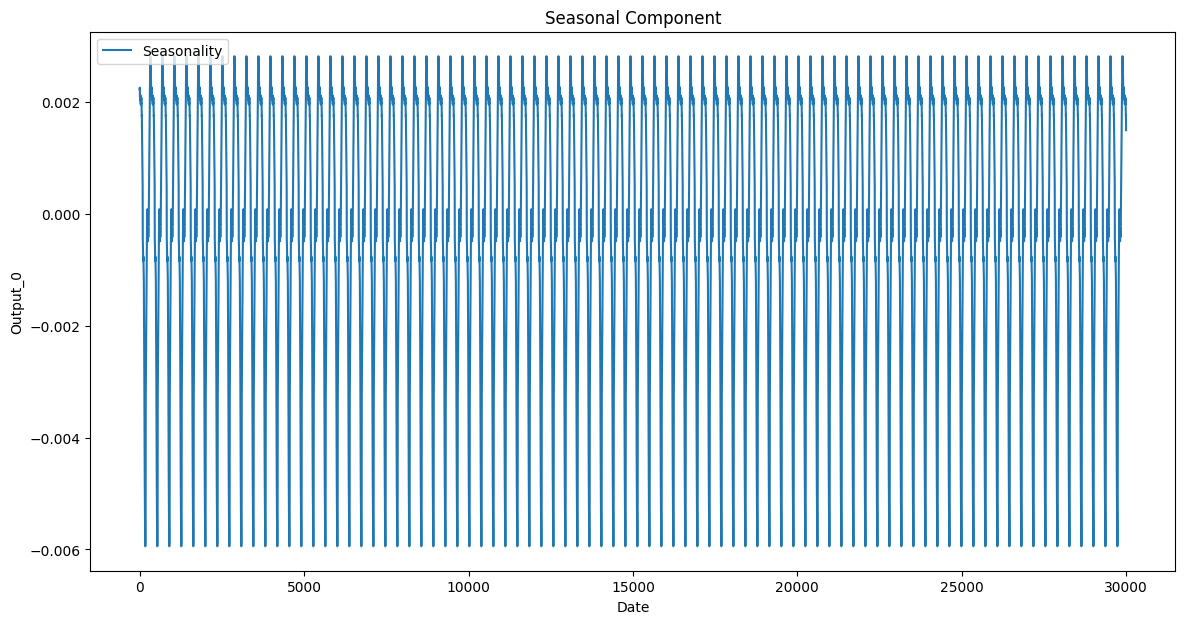

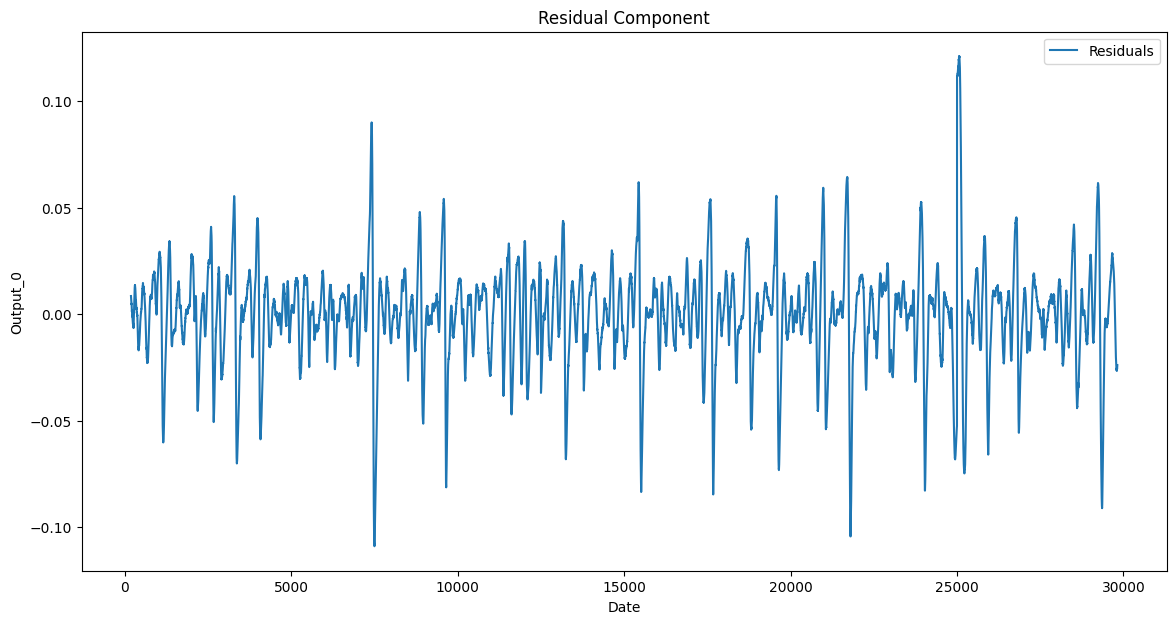

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the original time series
plt.figure(figsize=(14, 7))
plt.plot(data['output_0'], label='Time Series Data')
plt.title('Output Data Visualization')
plt.xlabel('Time')
plt.ylabel('Voltage Output (V)')
plt.legend()
plt.show()

# Decompose the time series
plt.figure()
result = seasonal_decompose(data['output_0'], model='additive', period=365)
result.plot()
plt.show()

# Check for stationarity
adf_result = adfuller(data['output_0'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

for key, value in adf_result[4].items():
    print(f'Critical Value {key}: {value}')

# Plot ACF and PACF
plt.figure(figsize=(14, 7))
plt.subplot(211)
plot_acf(data['output_0'], lags=50, ax=plt.gca())
plt.subplot(212)
plot_pacf(data['output_0'], lags=50, ax=plt.gca())
plt.show()

# Plot trend component
trend = result.trend.dropna()
plt.figure(figsize=(14, 7))
plt.plot(trend, label='Trend')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Output_0')
plt.legend()
plt.show()

# Plot seasonal component
seasonal = result.seasonal.dropna()
plt.figure(figsize=(14, 7))
plt.plot(seasonal, label='Seasonality')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Output_0')
plt.legend()
plt.show()

# Plot residual component
residual = result.resid.dropna()
plt.figure(figsize=(14, 7))
plt.plot(residual, label='Residuals')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Output_0')
plt.legend()
plt.show()

C:\Users\Noor1\AppData\Local\Temp\ipykernel_29988\1161524665.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = pd.DataFrame({'data': data}, index=pd.date_range(start='1/1/2020', periods=100, freq='M'))


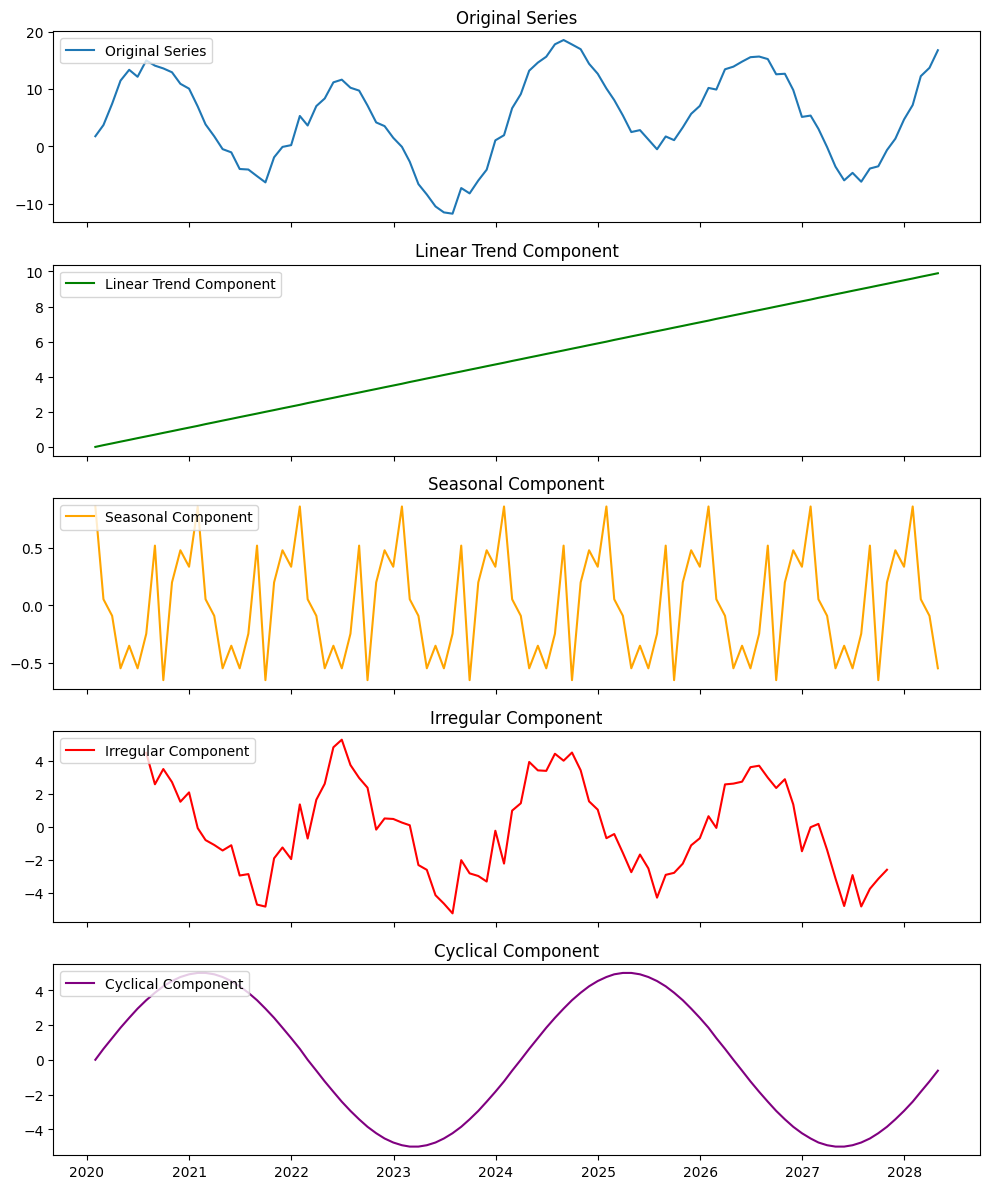

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate a sample time series data with a linear trend
np.random.seed(0)
time = np.arange(100)
linear_trend = time * 0.1
seasonal = 10 * np.sin(np.pi * time / 12)
cyclical = 5 * np.sin(np.pi * time / 25)
irregular = np.random.normal(0, 1, 100)
data = linear_trend + seasonal + cyclical + irregular

# Create a DataFrame
df = pd.DataFrame({'data': data}, index=pd.date_range(start='1/1/2020', periods=100, freq='M'))

# Decompose the time series
decomposition = seasonal_decompose(df['data'], model='additive', period=12)

# Plot the components
fig, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

axes[0].plot(df.index, df['data'], label='Original Series')
axes[0].set_title('Original Series')
axes[0].legend(loc='upper left')

axes[1].plot(df.index, linear_trend, label='Linear Trend Component', color='green')
axes[1].set_title('Linear Trend Component')
axes[1].legend(loc='upper left')

axes[2].plot(df.index, decomposition.seasonal, label='Seasonal Component', color='orange')
axes[2].set_title('Seasonal Component')
axes[2].legend(loc='upper left')

axes[3].plot(df.index, decomposition.resid, label='Irregular Component', color='red')
axes[3].set_title('Irregular Component')
axes[3].legend(loc='upper left')

axes[4].plot(df.index, cyclical, label='Cyclical Component', color='purple')
axes[4].set_title('Cyclical Component')
axes[4].legend(loc='upper left')

plt.tight_layout()
plt.savefig('time_series_decomposition.pdf')
plt.show()


In [6]:
import plotly.graph_objects as go

# Plotting function
def plot_predictions(actual, predicted, title='Actual vs Predicted Values'):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual Values', color='blue')
    plt.plot(predicted, label='Predicted Values', color='red')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.show()

def plot_predictions_plotly(actual, predicted, title='Actual vs Predicted Values'):
    fig = go.Figure()

    # Add actual values trace
    fig.add_trace(go.Scatter(x=list(range(len(actual))), y=actual, mode='lines', name='Actual Values', line=dict(color='blue')))
    
    # Add predicted values trace
    fig.add_trace(go.Scatter(x=list(range(len(predicted))), y=predicted, mode='lines', name='Predicted Values', line=dict(color='red')))
    
    # Update layout
    fig.update_layout(
        title=title,
        xaxis_title='Time',
        yaxis_title='Values',
        legend=dict(x=0, y=1.0)
    )
    
    fig.show()

In [7]:
# Load your dataset
# data = pd.read_csv('your_dataset.csv')

# Assuming `data` is a DataFrame with 7 input series named 'input1' to 'input7' and 'output' series
lags = 50 # Number of lagged observations to use

input_columns = [f'input_{i}' for i in range(activation_electrode_no)]

for i in range(1, lags + 1):
    for col in input_columns:
        data[f'{col}_lag{i}'] = data[col].shift(i)

# print(data.columns)
# Drop rows with NaN values created by lagging
data.dropna(inplace=True)

# Separate features and target
features = data.drop(columns=['output_0'])
target = data['output_0']

# Train-test split
train_size = int(len(data) * 0.8)
train_features, test_features = features[:train_size], features[train_size:]
train_target, test_target = target[:train_size], target[train_size:]

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(train_features, label=train_target)
dtest = xgb.DMatrix(test_features, label=test_target)


C:\Users\Noor1\AppData\Local\Temp\ipykernel_17680\1441658512.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_lag{i}'] = data[col].shift(i)
C:\Users\Noor1\AppData\Local\Temp\ipykernel_17680\1441658512.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_lag{i}'] = data[col].shift(i)
C:\Users\Noor1\AppData\Local\Temp\ipykernel_17680\1441658512.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [ ]:
# Set parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'colsample_bytree': 1.0,
    'learning_rate': 0.2,
    'max_depth': 7,
    'n_estimators': 1000,
    'subsample': 1.0
}

# Train the model
num_boost_round = 200
model = xgb.train(params, dtrain, num_boost_round)

# Make predictions
predictions = model.predict(dtest)

# Evaluate
rmse = mean_squared_error(test_target, predictions, squared=False)
print(f'RMSE: {rmse}')


# Using the function to plot the test set predictions
plot_predictions(test_target.values, predictions, title='Test Set: Actual vs Predicted')

# Using the function to plot the test set predictions
plot_predictions_plotly(test_target.values, predictions, title='Test Set: Actual vs Predicted')

# GRIDSERACH LONG RUNNING TIME

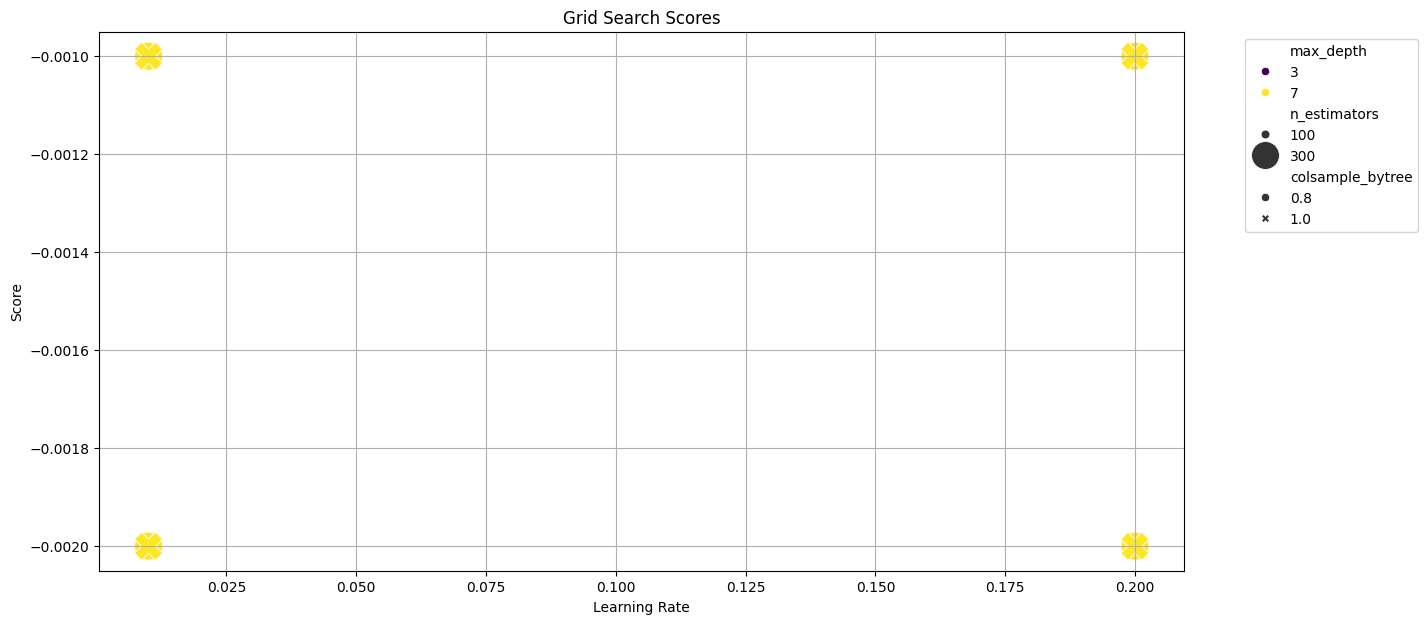

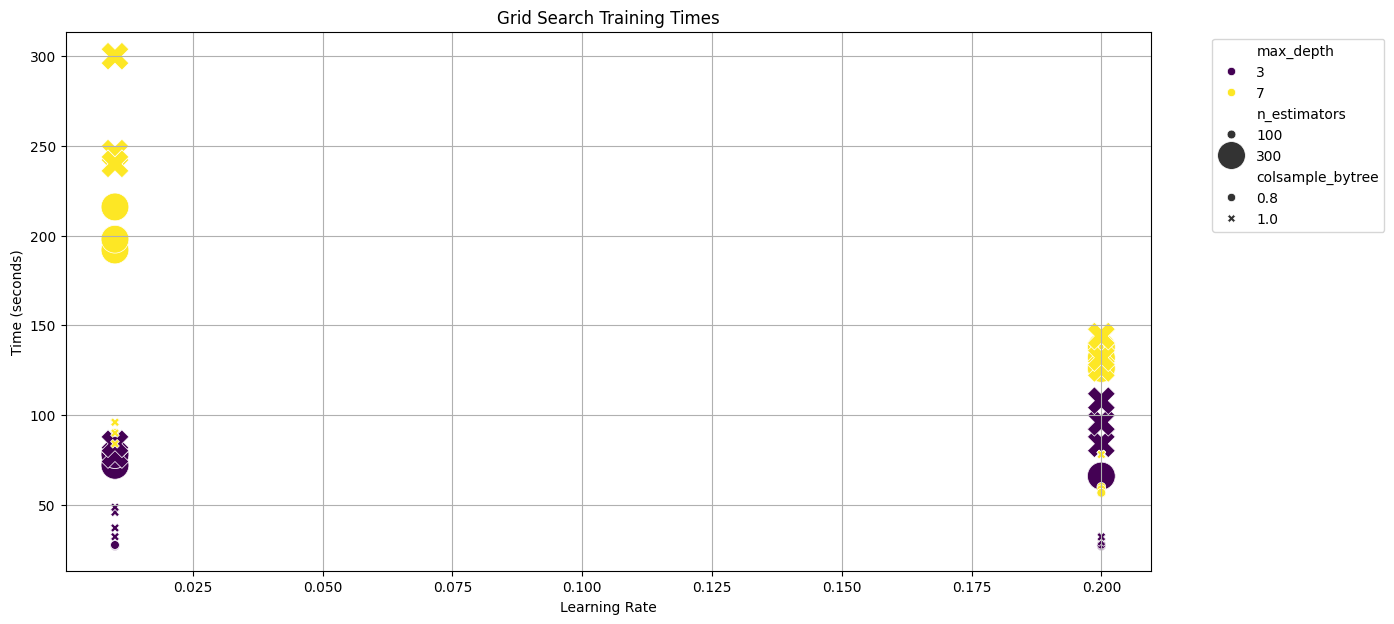

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grid_search_results(csv_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_path)
    
    # Convert time to seconds for easier plotting
    df['time'] = df['time'].apply(lambda x: convert_time_to_seconds(x))
    
    # Plot the scores
    plt.figure(figsize=(14, 7))
    sns.scatterplot(data=df, x='learning_rate', y='score', hue='max_depth', style='colsample_bytree', size='n_estimators', palette='viridis', sizes=(40, 400))
    plt.title('Grid Search Scores')
    plt.xlabel('Learning Rate')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    # Plot the training times
    plt.figure(figsize=(14, 7))
    sns.scatterplot(data=df, x='learning_rate', y='time', hue='max_depth', style='colsample_bytree', size='n_estimators', palette='viridis', sizes=(40, 400))
    plt.title('Grid Search Training Times')
    plt.xlabel('Learning Rate')
    plt.ylabel('Time (seconds)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

def convert_time_to_seconds(time_str):
    if 's' in time_str:
        return float(time_str.replace('s', ''))
    elif 'min' in time_str:
        return float(time_str.replace('min', '')) * 60
    else:
        return float(time_str)

# Usage
csv_path = r'C:\Users\Noor1\Documents\omar\forecast\Files_BSC_thesis\xgboost_grid_search.csv'
plot_grid_search_results(csv_path)

In [40]:
# Hyperparameter tuning with Grid Search
param_grid = {
    'max_depth': [3, 7],
    'learning_rate': [0.01, 0.2],
    'n_estimators': [100, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror')

# Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error', verbose=3)
grid_search.fit(train_features, train_target)

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Train with best parameters
best_model = grid_search.best_estimator_


Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=-0.002 total time=  26.9s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=-0.002 total time=  27.3s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0;, score=-0.002 total time=  27.5s
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0;, score=-0.002 total time=  27.6s
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.001 total time= 1.2min
[CV 2/2] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8;, score=-0.002 total time= 1.2min
[CV 1/2] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0;, score=-0.001 total time= 1.3min
[

In [ ]:
pd.DataFrame(grid_search.cv_results_).save_csv('grid_search_results.csv')

In [46]:
grid_search.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 300,
 'subsample': 1.0}

c:\Users\Noor1\Documents\omar\forecast\.venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



RMSE: 0.044079793386118206


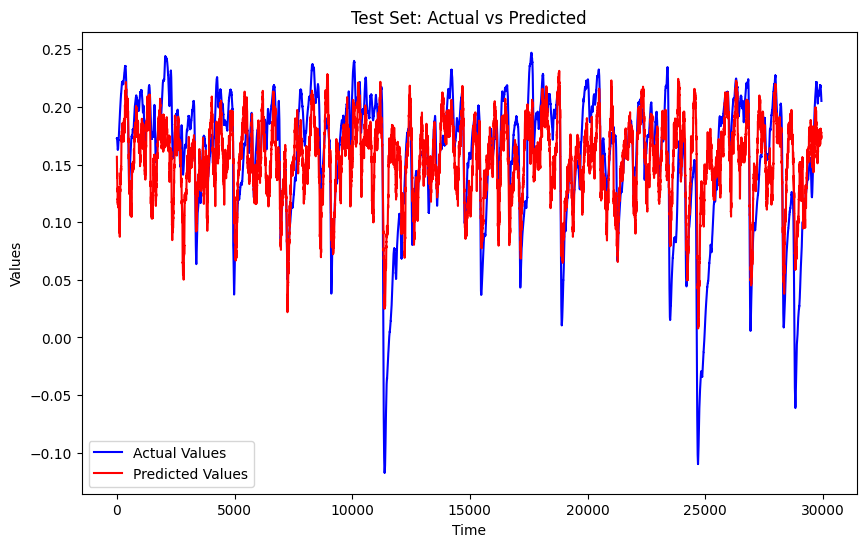

: 

In [57]:
# Make predictions
predictions_best = best_model.predict(test_features)

# Evaluate
rmse = mean_squared_error(test_target, predictions_best, squared=False)
print(f'RMSE: {rmse}')
# Using the function to plot the test set predictions
plot_predictions(test_target.values, predictions_best, title='Test Set: Actual vs Predicted')

# Using the function to plot the test set predictions
plot_predictions_plotly(test_target.values, predictions_best, title='Test Set: Actual vs Predicted')


In [9]:
# Set parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'colsample_bytree': 1.0,
    'learning_rate': 0.2,
    'max_depth': 4,
    'n_estimators': 500,
    'subsample': 1.0
}


# Train the model
num_boost_round = 100
model2 = xgb.train(params, dtrain, num_boost_round)

# Make predictions
predictions2 = model2.predict(dtest)

# Evaluate
rmse = mean_squared_error(test_target, predictions2, squared=False)
print(f'RMSE: {rmse}')

c:\Users\Noor1\Documents\omar\forecast\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 0.029177369977602986


c:\Users\Noor1\Documents\omar\forecast\.venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
# save predictions2 and the test_target value in a csv file, combine them first
df_pred = pd.DataFrame({'test_target': test_target, 'test_predictions': predictions2})
df_pred.to_csv('Xgboost_Test_prediction_labels60k.csv', index=False)


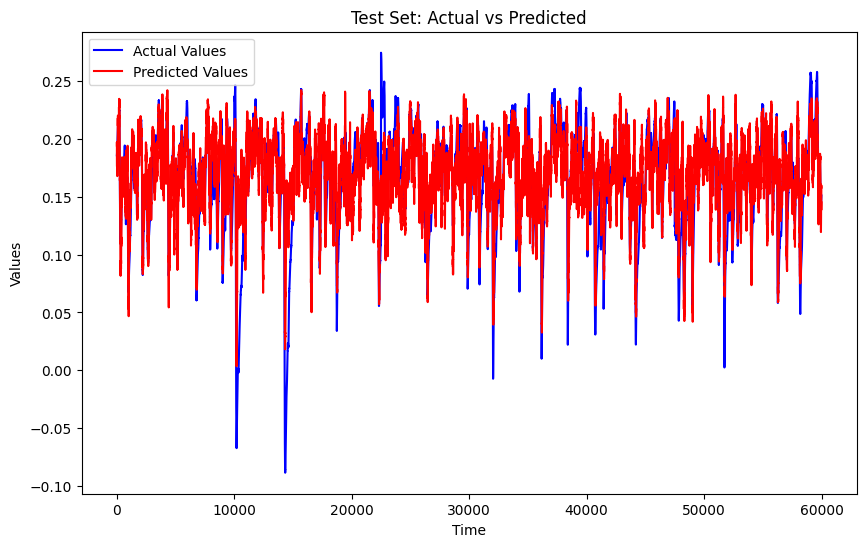

In [10]:
# Using the function to plot the test set predictions
plot_predictions(test_target.values, predictions2, title='Test Set: Actual vs Predicted')

# Using the function to plot the test set predictions
plot_predictions_plotly(test_target.values, predictions2, title='Test Set: Actual vs Predicted')

# plot_predictions_plotly(train_target.values, train_predictions2, title='Train Set: Actual vs Predicted')


In [ ]:
# Make predictions
predictions2 = model2.predict(dtest[])
train_predictions2 = model2.predict(dtrain)
# Evaluate
rmse = mean_squared_error(test_target, predictions2, squared=False)
print(f'RMSE: {rmse}')
# Using the function to plot the test set predictions
plot_predictions(test_target.values, predictions2, title='Test Set: Actual vs Predicted')

# Using the function to plot the test set predictions
plot_predictions_plotly(test_target.values, predictions2, title='Test Set: Actual vs Predicted')

plot_predictions_plotly(train_target.values, train_predictions2, title='Train Set: Actual vs Predicted')

In [1]:
# get how many parameters the xgboost model has
model2.get_dump()[0].count('[')

NameError: name 'model2' is not defined